In [1]:
import pandas as pd
rankeds = pd.read_csv('high_diamond_ranked_10min.csv')

In [2]:
toDrop = []

for team in ['blue', 'red']:
    for case in ['WardsDestroyed', 'GoldDiff', 'ExperienceDiff', 'CSPerMin', 'GoldPerMin', 'AvgLevel', 'TotalExperience', 'EliteMonsters', 'TotalJungleMinionsKilled', 'FirstBlood', 'Heralds', 'TowersDestroyed', 'Dragons']:
        toDrop.append(team + case)
        
rankeds.drop(['gameId'] + toDrop,  axis=1, inplace=True)

for column in rankeds.columns:
    if 'red' in column:
        rankeds.drop(column,  axis=1, inplace=True)


In [3]:
rankeds.columns

Index(['blueWins', 'blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueTotalMinionsKilled'],
      dtype='object')

In [4]:
# rankeds['redWins'] = rankeds.apply(lambda row: row.blueWins == 0, axis=1)
# rankeds['blueWins'] = rankeds.apply(lambda row: row.blueWins == 1, axis=1)

In [5]:
rankeds.head(10)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,0,28,9,6,11,17210,195
1,0,12,5,5,5,14712,174
2,0,15,7,11,4,16113,186
3,0,43,4,5,5,15157,201
4,0,75,6,6,6,16400,210
5,1,18,5,3,6,15899,225
6,1,18,7,6,7,16874,225
7,0,16,5,13,3,15305,209
8,0,16,7,7,8,16401,189
9,1,13,4,5,5,15057,220


In [6]:
rankeds.describe()

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,6.183925,6.137666,6.645106,16503.455512,216.699565
std,0.500024,18.019177,3.011028,2.933818,4.064520,1535.446636,21.858437
min,0.000000,5.000000,0.000000,0.000000,0.000000,10730.000000,90.000000
25%,0.000000,14.000000,4.000000,4.000000,4.000000,15415.500000,202.000000
50%,0.000000,16.000000,6.000000,6.000000,6.000000,16398.000000,218.000000
75%,1.000000,20.000000,8.000000,8.000000,9.000000,17459.000000,232.000000
max,1.000000,250.000000,22.000000,22.000000,29.000000,23701.000000,283.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

corr = rankeds.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values, annot=True )


Text(0.5, 1.0, 'Zależność długości od szerokości kielicha')

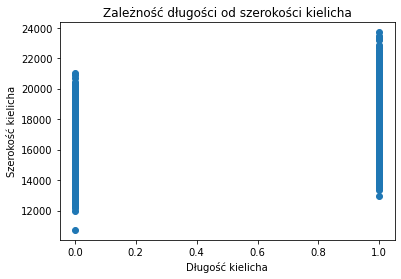

In [8]:
plt.scatter(rankeds['blueWins'], rankeds['blueTotalGold'])
plt.xlabel('Długość kielicha')
plt.ylabel('Szerokość kielicha')
plt.title('Zależność długości od szerokości kielicha')

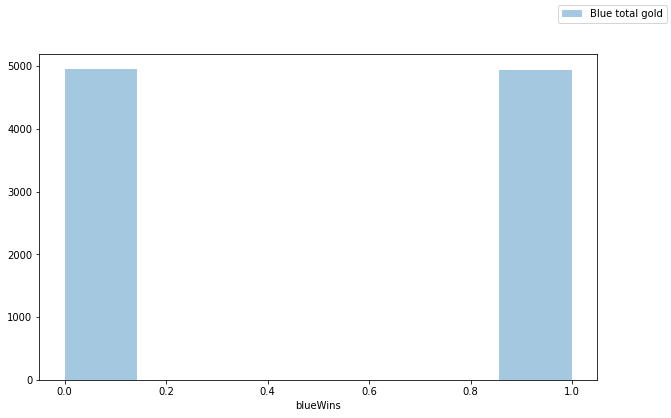

In [9]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueWins'], label='Blue total gold', bins=7,  kde=False)
fig.legend(labels=['Blue total gold'])

plt.show()

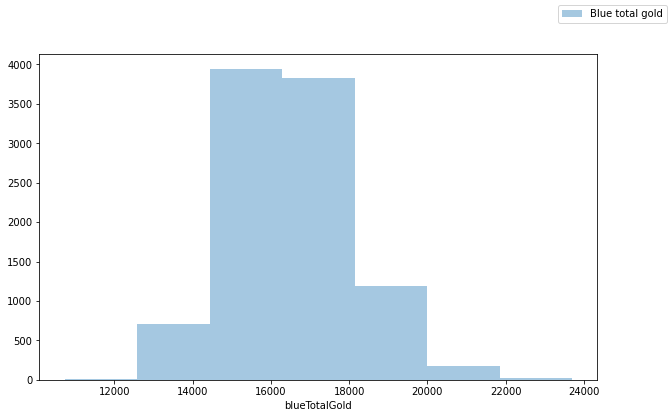

In [10]:

fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueTotalGold'], label='Blue total gold', bins=7,  kde=False)
fig.legend(labels=['Blue total gold'])

plt.show()


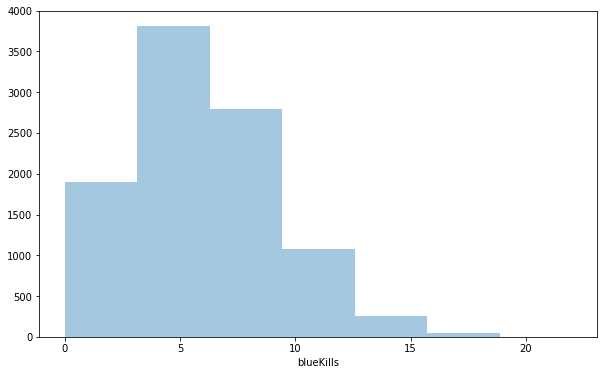

In [11]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueKills'], label='Blue kills', bins=7,  kde=False)

plt.show()

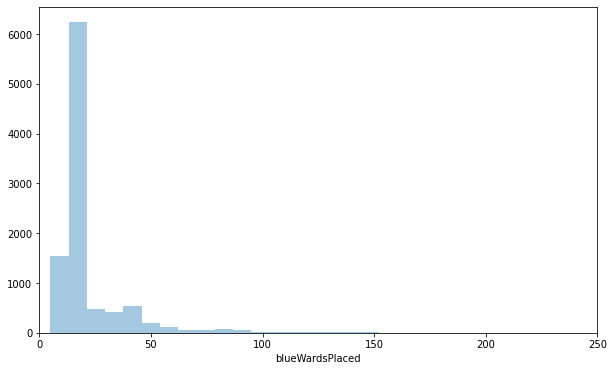

In [12]:
fig = plt.figure(figsize=(10,6))
plt.xlim(0, rankeds['blueWardsPlaced'].max())
sns.distplot(rankeds['blueWardsPlaced'], label='Blue kills', bins=30,  kde=False)

plt.show()

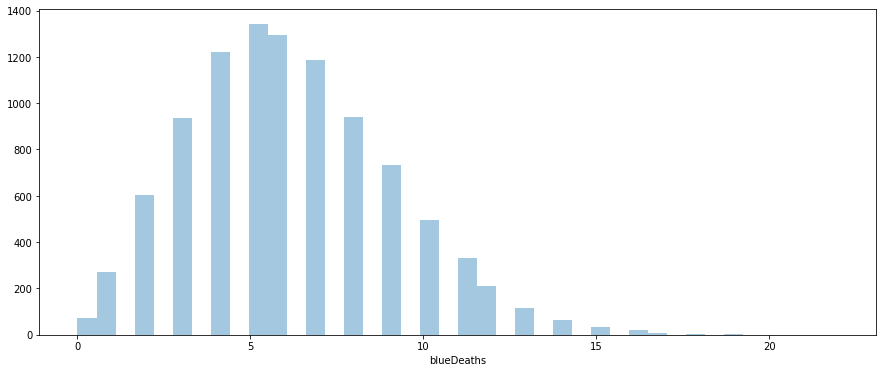

In [13]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueDeaths'], label='Blue deaths', bins=40,  kde=False)

plt.show()

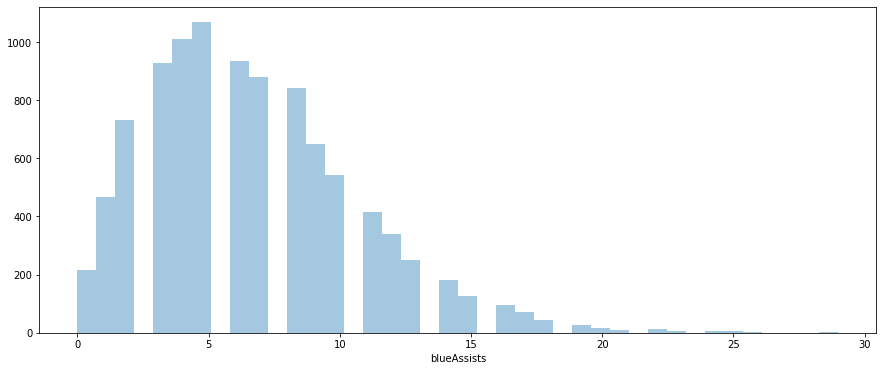

In [14]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueAssists'], label='Blue assissts', bins=40,  kde=False)

plt.show()

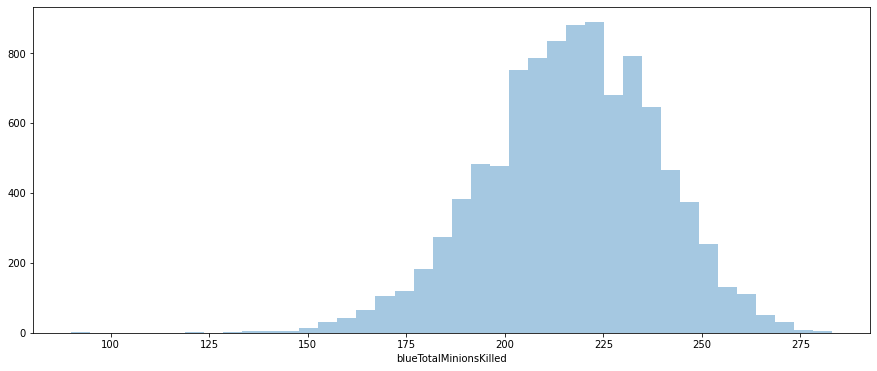

In [15]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueTotalMinionsKilled'], label='Blue assissts', bins=40,  kde=False)

plt.show()

### Odległość euklidesowa


In [16]:
# funkcja pomocnicza
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [17]:
euclidean_distance(rankeds.blueTotalGold.loc[0], rankeds.blueTotalGold.loc[1])

2498.0

### Standaryzacja danych za pomocą StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rankeds_standarized = pd.DataFrame(scaler.fit_transform(rankeds), columns = rankeds.columns)
rankeds_standarized.head()

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,-0.998079,0.316996,0.935301,-0.046926,1.071495,0.460179,-0.992782
1,-0.998079,-0.570992,-0.393216,-0.387796,-0.404768,-1.166792,-1.953558
2,-0.998079,-0.404494,0.271042,1.657424,-0.650812,-0.254307,-1.404543
3,-0.998079,1.149484,-0.725346,-0.387796,-0.404768,-0.876959,-0.718275
4,-0.998079,2.925460,-0.061087,-0.046926,-0.158724,-0.067382,-0.306513


In [19]:
scaler.mean_

array([4.99038364e-01, 2.22882883e+01, 6.18392550e+00, 6.13766576e+00,
       6.64510578e+00, 1.65034555e+04, 2.16699565e+02])

In [20]:
scaler.scale_

array([4.99999075e-01, 1.80182645e+01, 3.01087558e+00, 2.93366922e+00,
       4.06431418e+00, 1.53536892e+03, 2.18573310e+01])

In [21]:
#po standaryzacji
euclidean_distance(rankeds_standarized.blueTotalGold.loc[0], rankeds_standarized.blueTotalGold.loc[1])

1.6269705376383046

### Klastrowanie metodą k-średnich = 2

In [33]:
from sklearn.cluster import KMeans

In [34]:
k2 = KMeans(n_clusters=2)
k2.fit(rankeds_standarized)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

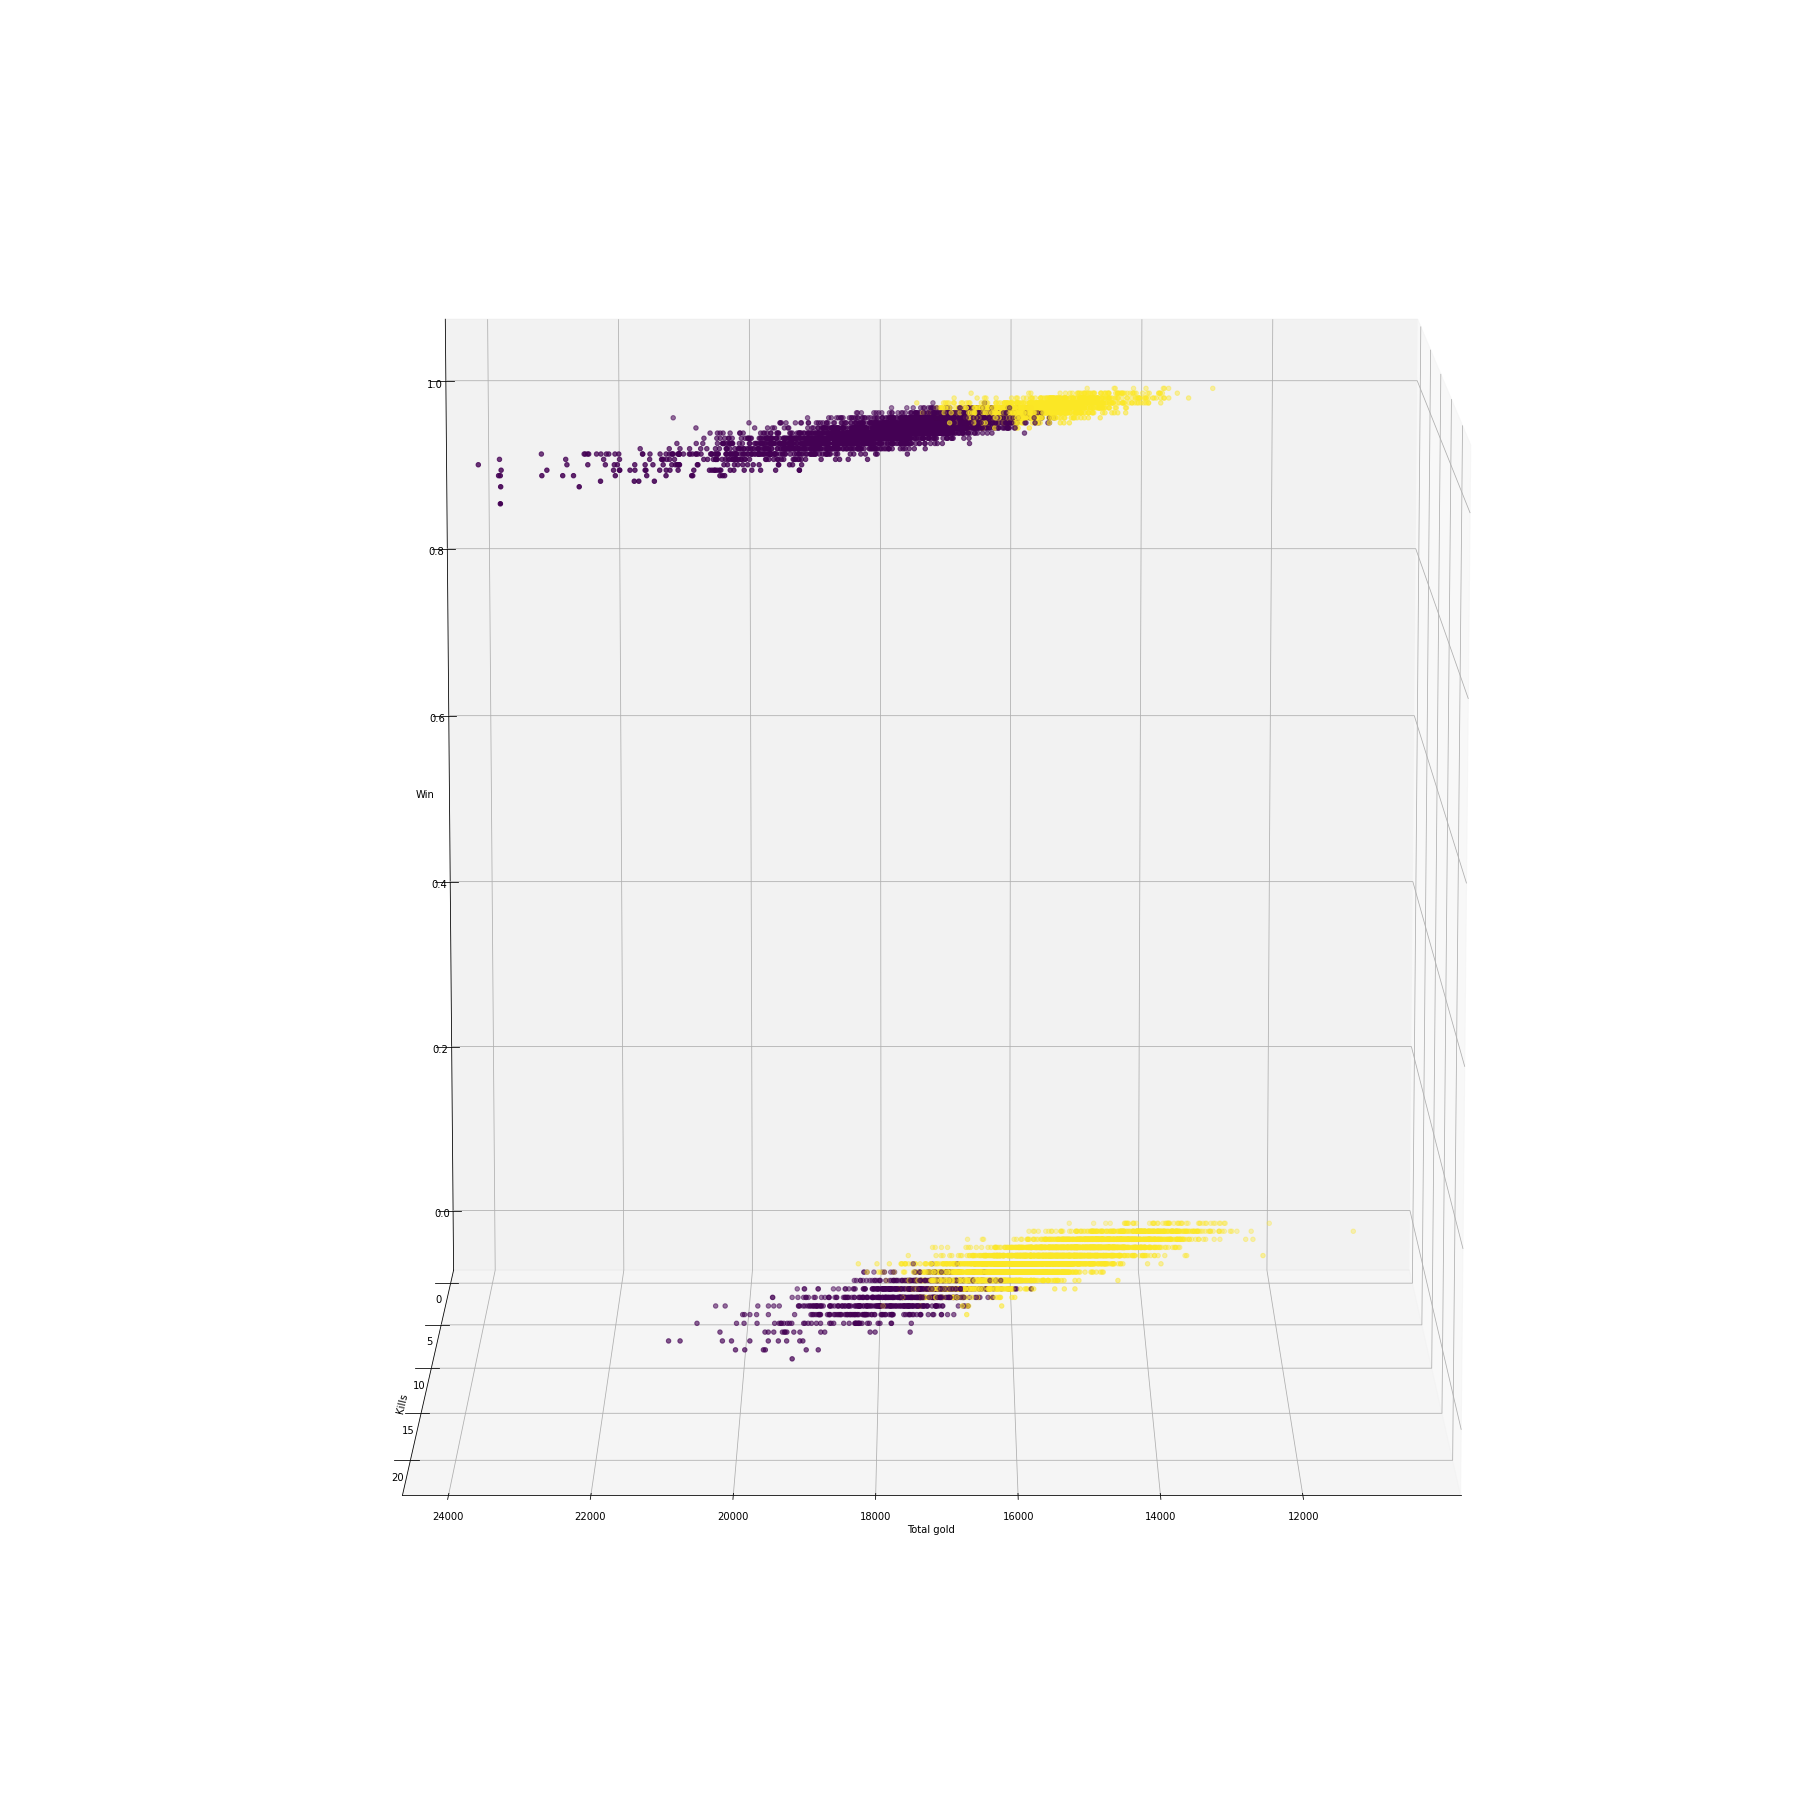

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=k2.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

### Analiza modeli k-means dla zakresu (2,15)


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_clusters = []
inertia = []
silhouette = []
calinski = []

for k in range(2,15):
    km = KMeans(n_clusters = k)
    km.fit(rankeds_standarized)
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(rankeds_standarized, km.labels_))
    calinski.append(calinski_harabasz_score(rankeds_standarized, km.labels_))
    inertia.append(km.inertia_)
    


In [ ]:
plt.scatter(k_clusters, silhouette)
plt.xlabel('Clusters count')
plt.ylabel('Silhouette coefficient')


In [ ]:
plt.scatter(k_clusters, calinski)
plt.xlabel('Clusters count')
plt.ylabel('Calinski-Harabasz score')

In [ ]:
plt.scatter(k_clusters, inertia)
plt.xlabel('Clusters count')
plt.ylabel('Inertia')

### Grupowanie metodą K-means (n=3)

In [26]:
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rankeds)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(rankeds, kmeans.labels_, metric='euclidean'))
    calinski_harabaz_scores.append(metrics.calinski_harabaz_score(rankeds, kmeans.labels_))

C:\Users\Przemek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Przemek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Przemek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Przemek\Anaconda3\lib\site-packages\sklearn\utils\depre

ValueError: x and y must be the same size

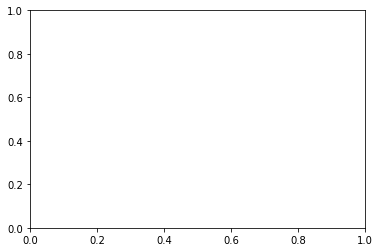

In [27]:
plt.scatter(x=np.arange(2,12), y=inertia_scores)

In [ ]:
plt.scatter(x=np.arange(2,12), y=silhouette_scores)

In [ ]:
plt.scatter(x=np.arange(2,12), y=calinski_harabaz_scores)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(rankeds)

In [ ]:
clusterCenters = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
clusterCenters.columns = rankeds.columns

clusterCenters

In [314]:
rankeds_new = scaler.inverse_transform(rankeds)
rankeds_classified = pd.DataFrame(rankeds_new)
rankeds_classified.columns = rankeds.columns
rankeds_classified['class'] = kmeans.labels_
rankeds_classified.head(10)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled,class
0,0.0,28.0,9.0,6.0,11.0,17210.0,195.0,1
1,0.0,12.0,5.0,5.0,5.0,14712.0,174.0,0
2,0.0,15.0,7.0,11.0,4.0,16113.0,186.0,0
3,0.0,43.0,4.0,5.0,5.0,15157.0,201.0,0
4,0.0,75.0,6.0,6.0,6.0,16400.0,210.0,0
5,1.0,18.0,5.0,3.0,6.0,15899.0,225.0,0
6,1.0,18.0,7.0,6.0,7.0,16874.0,225.0,1
7,0.0,16.0,5.0,13.0,3.0,15305.0,209.0,0
8,0.0,16.0,7.0,7.0,8.0,16401.0,189.0,0
9,1.0,13.0,4.0,5.0,5.0,15057.0,220.0,0


In [315]:
rankeds_classified.groupby(rankeds_classified['class']).size()


class
0    5557
1    4322
dtype: int64

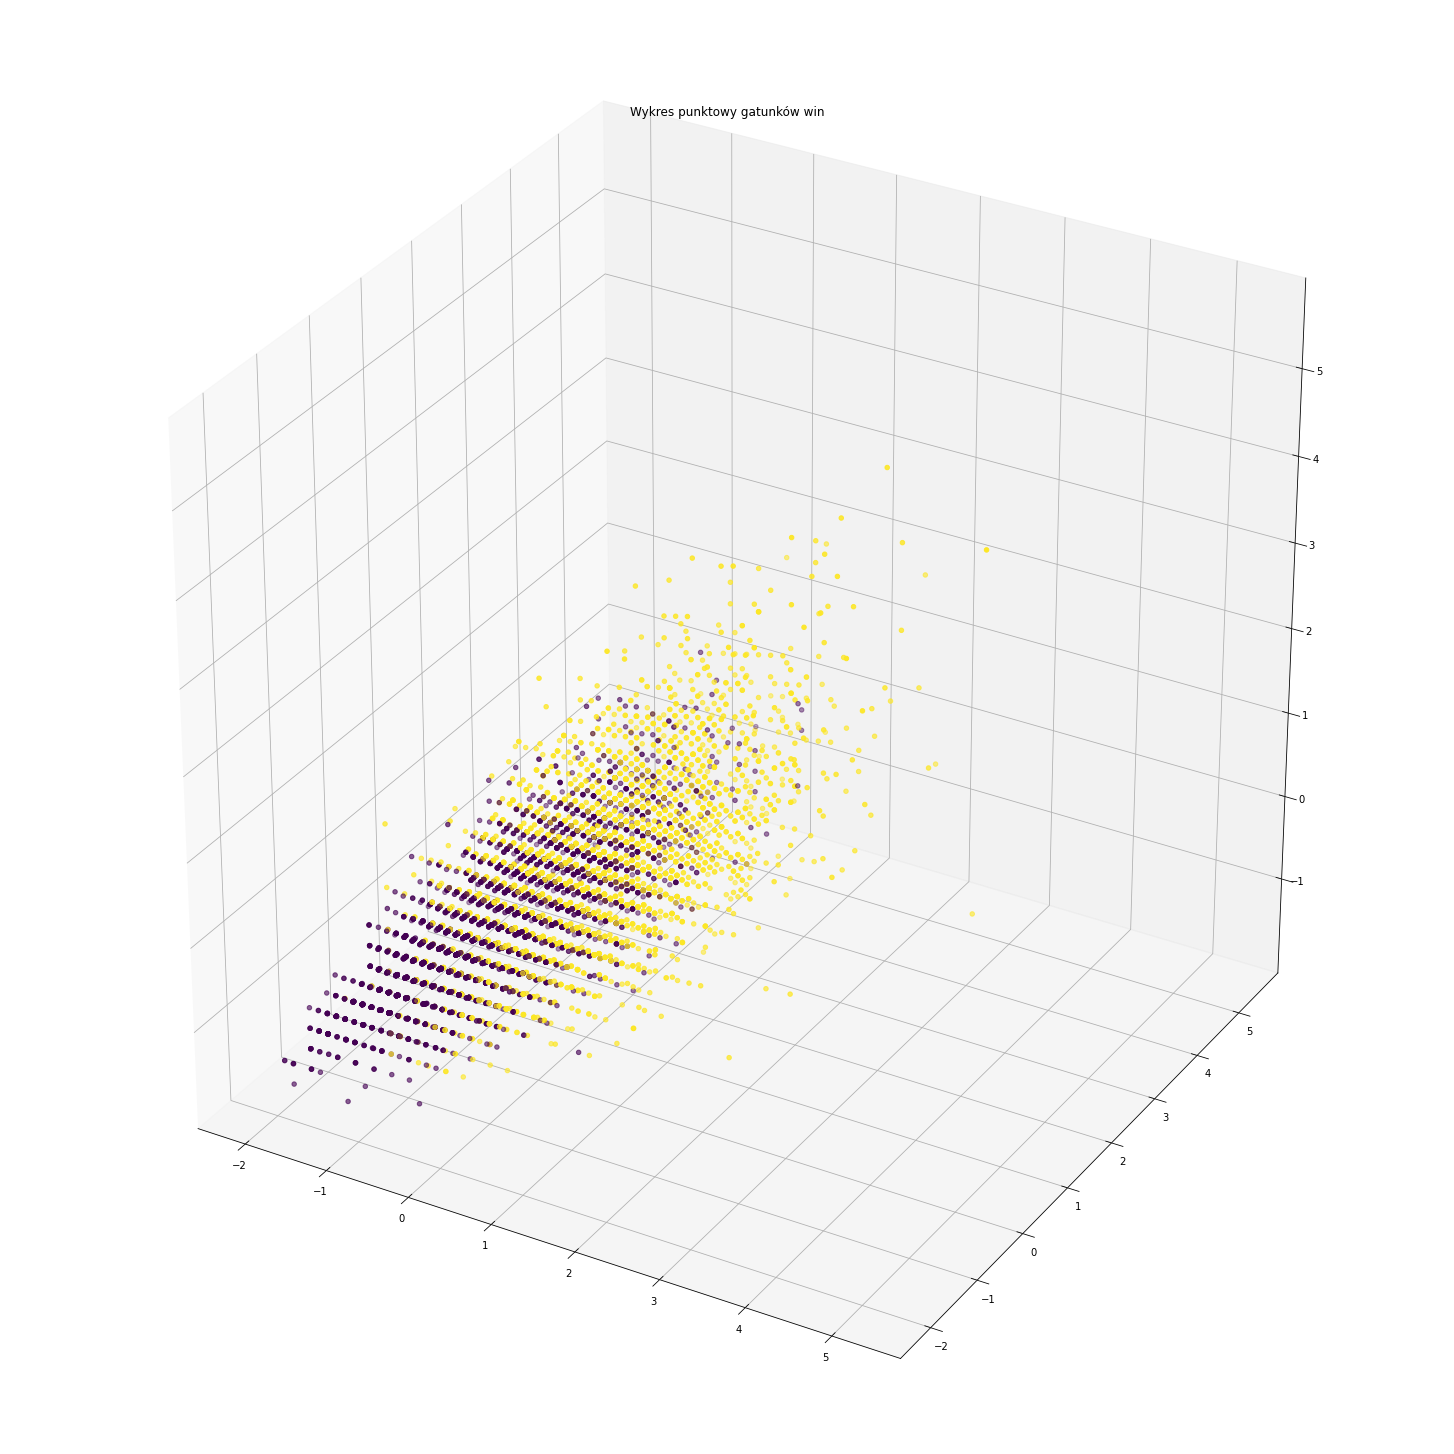

In [316]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.scatter(
rankeds['blueKills'],
rankeds['blueDeaths'],
rankeds['blueAssists'],
c=kmeans.labels_
)
plt.title('Wykres punktowy gatunków win')
plt.show()

In [300]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

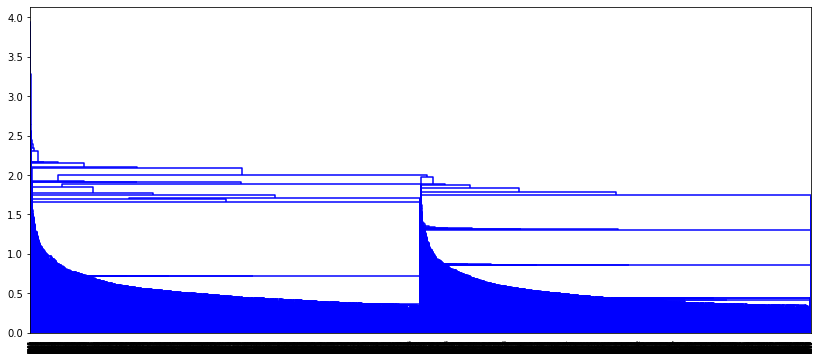

In [301]:
linkage_matrix =linkage(rankeds, 'single')
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

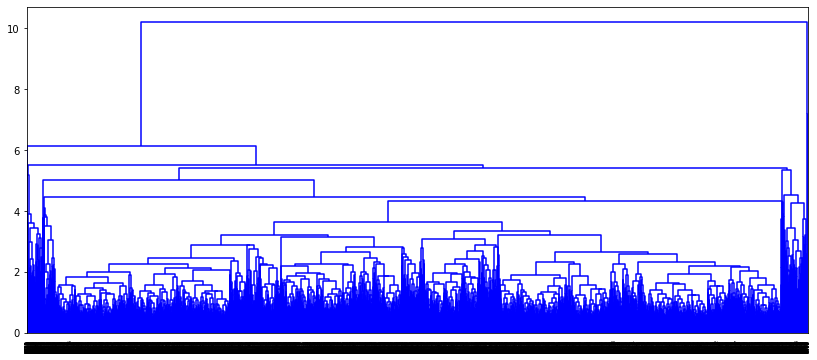

In [302]:
linkage_matrix = linkage(rankeds, 'average')
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

In [303]:
class_number = fcluster(linkage_matrix, t=5, criterion='maxclust')

class_number

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [304]:
centers_new = rankeds.groupby(class_number).mean()
centers_new_df = pd.DataFrame(scaler.inverse_transform(centers_new))
centers_new_df.columns = rankeds.columns
centers_new_df

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,0.333333,17.000000,11.333333,16.666667,18.000000,17685.666667,164.333333
1,0.975610,24.004878,13.926829,6.380488,16.517073,20379.682927,221.375610
2,0.488822,22.098737,6.016249,6.126578,6.431691,16419.629994,216.619851
3,1.000000,123.500000,12.000000,4.500000,8.000000,21510.500000,255.000000
4,0.571429,207.000000,7.000000,10.285714,6.857143,16751.285714,201.285714
